# Author: Aditi Bane

---
## Task 2: Prediction using Unsupervised ML


In this task I will try to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset by using K means clustering algorithm.

Technology Stack: Numpy, Pandas, Matplotlib, Scikit Learn, Seaborn


Impoting the essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

Understanding the dataset

In [2]:
#Importing our Iris dataset
dataset = pd.read_csv("iris.csv")

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.drop("Id", axis=1, inplace = True)

In [5]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
dataset.shape

(150, 5)

In [8]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Species'] = le.fit_transform(dataset['Species']) 
dataset['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

Petal Length in Cm VS Petal Length in Cm

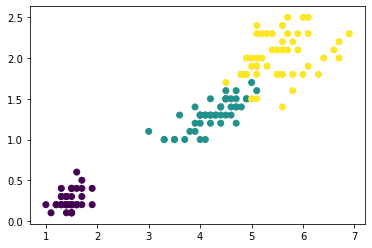

In [11]:
plt.scatter(dataset['PetalLengthCm'],dataset['PetalWidthCm'],c=dataset.Species.values)

In [12]:
dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


Data Visualization

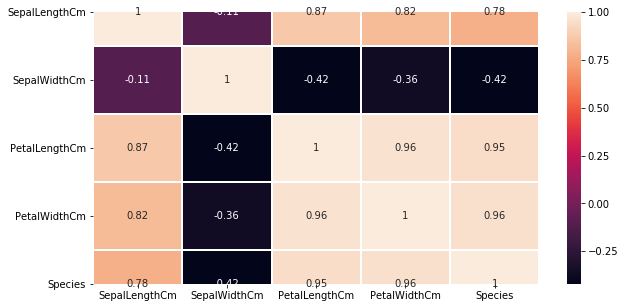

In [13]:
fig=plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(),linewidths=1,annot=True)

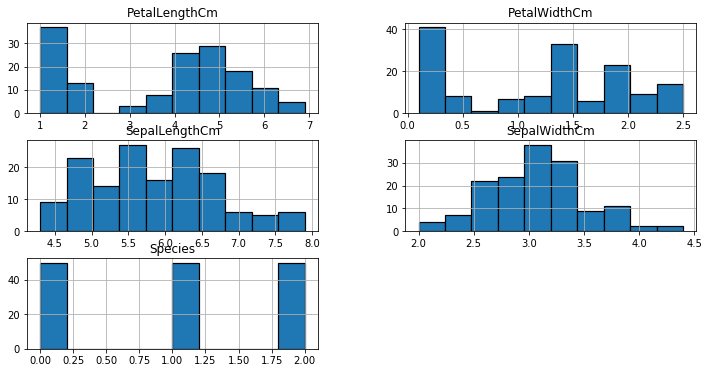

In [14]:
dataset.hist(edgecolor='black', linewidth = 1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

Elbow method using within-cluster-sum-of-squares(wcss)

In [15]:
from sklearn.cluster import KMeans
features = dataset.iloc[:, [0, 1, 2, 3]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init= 'k-means++', random_state = 42)
    kmeans.fit(dataset)
    #inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
wcss

[780.8244,
 179.12221033868093,
 87.31002785114046,
 66.97905140650855,
 50.419491269841274,
 42.77019525844526,
 35.400319682330554,
 31.255435242696116,
 29.07695663634823,
 26.857226362596215]

Using Elbow Graph to find optimum number of Clusters

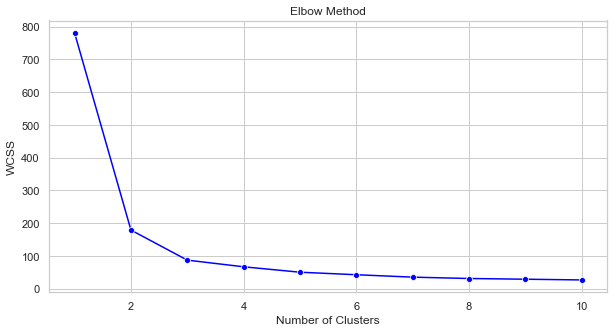

In [16]:
plt.figure(figsize=(10,5))
sns.set(style = 'whitegrid')
sns.lineplot(range(1,11),wcss,marker='o',color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The optimum value for K would be 3. As we can see that with an increase in the number of clusters the WCSS value decreases. We select the value for K on the basis of the rate of decrease in WCSS and we can see that after 3 the drop in WCSS in minimal.

In [17]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state= 5)
y_kmeans = kmeans.fit_predict(features)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Visualizing the Clusters

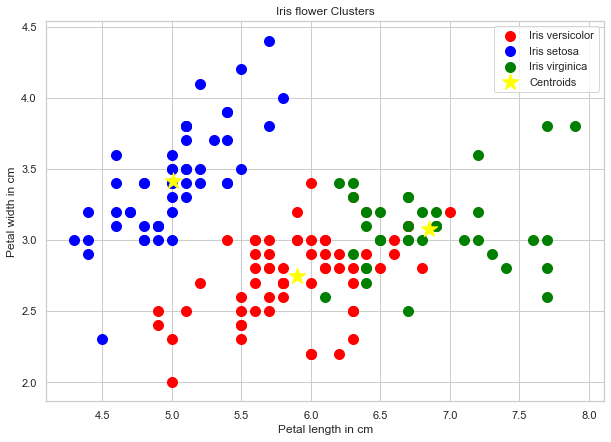

In [18]:
fig = plt.figure(figsize=(10,7))
plt.title('Clusters with centroids', fontweight = 'bold', fontsize = 20)
plt.scatter(features[y_kmeans == 0,0], features[y_kmeans == 0,1], s = 100, c = 'red', label = 'Iris versicolor')
plt.scatter(features[y_kmeans == 1,0], features[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Iris setosa')
plt.scatter(features[y_kmeans == 2,0], features[y_kmeans == 2,1], s = 100, c = 'green', label = 'Iris virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', marker='*', label = 'Centroids')
plt.title('Iris flower Clusters')
plt.ylabel('Petal width in cm')
plt.xlabel('Petal length in cm')
plt.legend()                                           
                                           